### NLP Med Cab Part ii
- cont. from 1.3 Notebook
- Perform stemming and lemmatization on tokens

In [36]:
"""
Import Statements

"""

# Classics
import numpy as np
import pandas as pd

# Base
from collections import Counter

# Plotting
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

In [216]:
pwd

'/Users/jorge/Med-Cabinet-2/Data'

In [217]:
ls

Untitled.ipynb  cannabis.csv    medcab.csv      medcab1_2.csv


In [18]:
df = pd.read_csv('/Users/jorge/Med-Cabinet-2/Data/medcab1_2.csv')
df = df.fillna('none')
df = df.drop('Unnamed: 0', 1)
df = df.replace([True, False],
                    [1.0, 0.0])
print(df.shape)
df.head(3)

(2350, 73)


,index,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,Apple_flavor,Apricot_flavor,...,hybrid_type,sativa_type,indica_type,Savor,Style,Breed,Text,Effects_and_Flavor,ID,tokens
0,0.0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,0,0,0,...,1.0,0.0,0.0,", Earthy, Sweet, Citrus",", $100 OG is a 50/50 hybrid strain that packs ...",", 100-Og",Creative Energetic Tingly Euphoric Relaxed...,"Creative, Energetic, Tingly, Euphoric, Relaxed...",0.0,"['creative', 'energetic', 'tingly', 'euphoric'..."
1,1.0,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,0,0,0,...,1.0,0.0,0.0,", Flowery, Violet, Diesel",", The ‘98 Aloha White Widow is an especially p...",", 98-White-Widow",Relaxed Aroused Creative Happy Energetic ...,"Relaxed, Aroused, Creative, Happy, Energetic, ...",1.0,"['relaxed', 'aroused', 'creative', 'happy', 'e..."
2,2.0,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,0,0,0,...,0.0,1.0,0.0,", Spicy/Herbal, Sage, Woody",", 1024 is a sativa-dominant hybrid bred in Spa...",", 1024",Uplifted Happy Relaxed Energetic Creative ...,"Uplifted, Happy, Relaxed, Energetic, Creative,...",2.0,"['uplifted', 'happy', 'relaxed', 'energetic', ..."


### Search Results by quality strains:

In [19]:
good_stuff = df[df['Rating'] >= 4.0]

In [20]:
good_stuff = df.replace(np.nan, '', regex=True)

### Standaridize our string input:

In [21]:
df.columns

Index(['index', 'Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Ammonia_flavor', 'Apple_flavor', 'Apricot_flavor', 'Berry_flavor',
       'Blue_flavor', 'Blueberry_flavor', 'Citrus_flavor', 'Cheese_flavor',
       'Chemical_flavor', 'Chestnut_flavor', 'Diesel_flavor', 'Earthy_flavor',
       'Flowery_flavor', 'Fruit_flavor', 'Grape_flavor', 'Grapefruit_flavor',
       'Honey_flavor', 'Lavender_flavor', 'Lemon_flavor', 'Mango_flavor',
       'Menthol_flavor', 'Mint_flavor', 'Minty_flavor', 'Nutty_flavor',
       'Orange_flavor', 'Peach_flavor', 'Pepper_flavor', 'Pine_flavor',
       'Pineapple_flavor', 'Pungent_flavor', 'Sage_flavor', 'Skunk_flavor',
       'SpicyHerbal_flavor', 'Strawberry', 'Sweet_flavor', 'Tea_flavor',
       'Tobacco_flavor', 'Tree_flavor', 'Tropical_flavor', 'Vanilla_flavor',
       'Violet_flavor', 'Woody_flavor', 'Aroused_effect', 'Creative_effect',
       'Energetic_effect', 'Euphoric_effect', 'Focused_effect',
       'Giggly_effect', 'Ha

Combine labels into one string, for vectorization:

In [22]:
import re, string
# df['tokens'].head()
df['tokens'] = df['tokens'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')
df['tokens'] = df['tokens'].str.replace(r'<[^<]+?>', '').str.replace(r'^b.', '')
df['tokens'] = df['tokens'].str.replace('/', ' ')

In [23]:
def punct_cleaning(column):
    processed_data = []
    for i in column:
        text = re.sub('[%s]' % string.punctuation, '', i).lower()
        processed_data.append(text)
    return pd.DataFrame(processed_data)

In [24]:
df['tokens'] = punct_cleaning(df['tokens'])
df['tokens'][0]

'creative energetic tingly euphoric relaxed earthy sweet citrus 100 og 50 50 hybrid packs strong punch supposedly refers strength high price started showing hollywood plant 100 og tends produce large dark green stems users report strong body effect indica pain relief alert cerebral feeling thanks sativa side 100og 100 og 50 50 hybrid packs strong punch supposedly refers strength high price started showing hollywood plant 100 og tends produce large dark green stems users report strong body effect indica pain relief alert cerebral feeling thanks sativa side'

In [25]:
df['lemmas'] = df['tokens'].apply(lambda text: 
                                  [token.lemma_ for token in nlp(text) if (token.is_stop != True) and 
                                  (token.is_punct != True)])

In [26]:
df['lemmas'] = df['lemmas'].str.join(' ')
df['lemmas']

0       creative energetic tingly euphoric relaxed ear...
1       relax arouse creative happy energetic flowery ...
2       uplift happy relaxed energetic creative spicy ...
3       tingly creative hungry relaxed uplifted aprico...
4       happy relaxed euphoric uplifted talkative citr...
5       3 bear og mephisto autoflowere cross bear og k...
6       relax euphoric happy uplifted hungry earthy sw...
7       relax happy euphoric uplifted giggly citrus pu...
8       uplift focus happy talkative relaxed earthy wo...
9       relax tingly happy euphoric uplifted earthy gr...
10      energetic happy talkative uplifted pine diesel...
11      relax euphoric sleepy happy talkative earthy p...
12      relax focus euphoric uplifted aroused earthy w...
13      euphoric happy uplifted talkative creative ear...
14      relax uplifted happy creative euphoric citrus ...
15      relax happy euphoric giggly sleepy earthy dies...
16      831 og aka santa cruz og indicadominant develo...
17      relax 

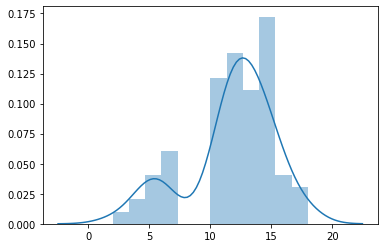

In [207]:
sns.distplot(doc_len)
plt.show()

In [228]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [229]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,,2346,229405,1.0,0.141129,0.141129,0.998298
3,e,2350,169514,2.0,0.104284,0.245414,1.000000
11,a,2350,110298,3.0,0.067855,0.313269,1.000000
20,i,2347,108028,4.0,0.066458,0.379727,0.998723
18,s,2346,98981,5.0,0.060893,0.440620,0.998298


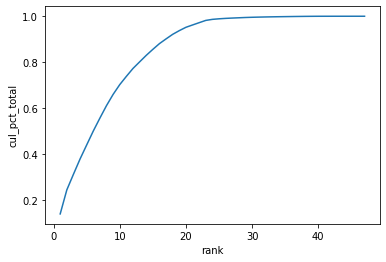

In [230]:
# cumlative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

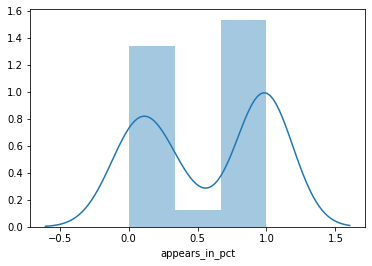

In [231]:
# Frequency of apperances
sns.distplot(wc['appears_in_pct'])
plt.show()